In [6]:
! kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 665M/675M [00:06<00:00, 99.0MB/s]
100% 675M/675M [00:06<00:00, 114MB/s] 


In [ ]:
!unzip \*.zip

In [8]:
import numpy as np
import os
from PIL import Image

In [9]:
positive = os.listdir("/content/cell_images/cell_images/Parasitized")
negative = os.listdir("/content/cell_images/cell_images/Uninfected")

dataset = []
labels = []

for img in positive:
  if(img != 'Thumbs.db'):
    im = Image.open('/content/cell_images/Parasitized/' + img)
    size = im.resize((30,30))
    image = np.array(size)
    dataset.append(image)
    labels.append(1)

for img in negative:
  if(img != 'Thumbs.db'):
    im = Image.open('/content/cell_images/Uninfected/' + img)
    size = im.resize((30,30))
    image = np.array(size)
    dataset.append(image)
    labels.append(0)
dataset = np.array(dataset)
labels = np.array(labels)

1
0


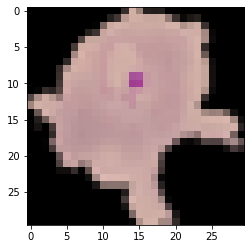

In [10]:
import matplotlib.pyplot as plt
plt.imshow(dataset[0])
print(labels[0])
print(labels[14500])

In [11]:
from sklearn.model_selection import train_test_split

train_x, x, train_y, y = train_test_split(dataset, labels, test_size = 0.2)
val_x, test_x, val_y, test_y = train_test_split(x, y, test_size = 0.2)

In [12]:
train_x[0].shape

(30, 30, 3)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [14]:
model = Sequential([
          Conv2D(16, (3, 3), input_shape = (30, 30, 3), activation = 'relu'),
          MaxPooling2D((2, 2)),
          Dropout(0.25),
          Conv2D(32, (3, 3), activation = 'relu'),
          MaxPooling2D((2, 2)),
          Dropout(0.25),
          Conv2D(64, (3, 3), activation = 'relu'),
          MaxPooling2D((2, 2)),
          Dropout(0.25),
          Flatten(),
          Dense(512, activation = 'relu'),
          Dropout(0.4),
          Dense(1, activation = 'sigmoid')
])

In [15]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_x, train_y, batch_size = 64, epochs = 10, validation_data = (val_x, val_y))

Train on 22046 samples, validate on 4409 samples
Epoch 1/10
22046/22046 [==============================] - 19s 842us/step - loss: 1.4890 - accuracy: 0.5055 - val_loss: 0.6933 - val_accuracy: 0.4997
Epoch 2/10
22046/22046 [==============================] - 17s 778us/step - loss: 0.6924 - accuracy: 0.5331 - val_loss: 0.6683 - val_accuracy: 0.6013
Epoch 3/10
22046/22046 [==============================] - 17s 786us/step - loss: 0.6767 - accuracy: 0.5808 - val_loss: 0.6449 - val_accuracy: 0.6312
Epoch 4/10
22046/22046 [==============================] - 17s 785us/step - loss: 0.6379 - accuracy: 0.6441 - val_loss: 0.5754 - val_accuracy: 0.7278
Epoch 5/10
22046/22046 [==============================] - 17s 778us/step - loss: 0.4031 - accuracy: 0.8205 - val_loss: 0.2222 - val_accuracy: 0.9263
Epoch 6/10
22046/22046 [==============================] - 17s 775us/step - loss: 0.2312 - accuracy: 0.9140 - val_loss: 0.1899 - val_accuracy: 0.9356
Epoch 7/10
22046/22046 [==============================] -

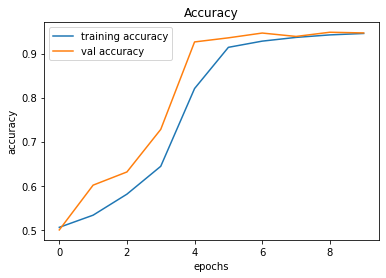

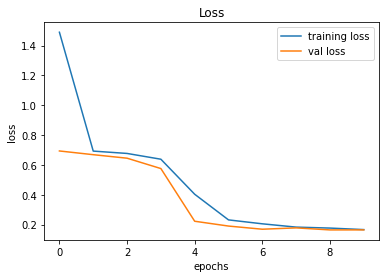

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [18]:
pred = model.predict_classes(test_x)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)

0.9456029011786038